<a href="https://colab.research.google.com/github/datagrad/Quantium-Internship/blob/main/QVI_Task_2_Kamal_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkred"><u><center> **Quantium Retail Analysis**


# **Quantium - Task 2**
We will be examining the performance in trial vs control stores to provide a recommendation for each location based on our insight.

- Select control stores – explore the data and define metrics for control store selection – "What would make them a control store?" Visualize the drivers to see suitability.
- Assessment of the trial – get insights of each of the stores. Compare each trial store with ontrol store to get its overall performance. We want to know if the trial stores were successful or not.

- Collate findings – summarise findings for each store and provide recommendations to share with client outlining the impact on sales during trial period.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df = pd.read_csv("https://cdn.theforage.com/vinternships/companyassets/32A6DqtsbF7LbKdcq/QVI_data.csv")


In [3]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


- Client has selected store numbers 77, 86 and 88 as trial stores.
- Client wants control stores to be established stores that are operational for the entire observation period.
- Trial period = 1 Feb 2019 to 30 April 2019.
- Compare trial stores to control stores that are similar pre-trial. Similarity measurement:
  - Monthly overall sales revenue
  - Monthly number of customers
  - Monthly number of transactions per customer

In [5]:
df["DATE"] = pd.to_datetime(df["DATE"])
df["YEARMONTH"] = df["DATE"].dt.strftime("%Y%m").astype("int") #Adding a new month ID column in the data with the format yyyymm

In [6]:
df["YEARMONTH"].min()

201807

In [7]:
df["YEARMONTH"].max()

201906

# Compile each store's monthly:

- Total sales
- Number of customers,
- Average transactions per customer
- Average chips per customer
- Average price per unit

In [8]:
def monthly_store_metrics(): #creating the metrics of interest and filter to stores that are present throughout the pre-trial period.
    store_yrmo_group = df.groupby(["STORE_NBR", "YEARMONTH"]) #grouping the data storewise and yearmonthwise
    total = store_yrmo_group["TOT_SALES"].sum() #getting the total sales groupwise
    num_cust = store_yrmo_group["LYLTY_CARD_NBR"].nunique() #getting the data of unique customers groupwise
    trans_per_cust = store_yrmo_group.size() / num_cust #ratio of total customers and no of unique customers w.r.t each group
    avg_chips_per_cust = store_yrmo_group["PROD_QTY"].sum() / num_cust # ratio of total quantity and no of unique customers w.r.t each group
    avg_chips_price = total / store_yrmo_group["PROD_QTY"].sum() #ratio of total sales and quantity w.r.t each group
    aggregates = [total, num_cust, trans_per_cust, avg_chips_per_cust, avg_chips_price]
    metrics = pd.concat(aggregates, axis=1)
    metrics.columns = ["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"]
    return metrics

In [9]:
qvi_monthly_metrics = monthly_store_metrics().reset_index()
qvi_monthly_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STORE_NBR        3169 non-null   int64  
 1   YEARMONTH        3169 non-null   int64  
 2   TOT_SALES        3169 non-null   float64
 3   nCustomers       3169 non-null   int64  
 4   nTxnPerCust      3169 non-null   float64
 5   nChipsPerTxn     3169 non-null   float64
 6   avgPricePerUnit  3169 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 173.4 KB


In [10]:
qvi_monthly_metrics.head()

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947


In [11]:
#pre trial observation
#filter only stores with full 12 months observation
observ_counts = qvi_monthly_metrics["STORE_NBR"].value_counts()
full_observ_index = observ_counts[observ_counts == 12].index #getting the store no. which have 12 months observations
full_observ = qvi_monthly_metrics[qvi_monthly_metrics["STORE_NBR"].isin(full_observ_index)] #filtering the data which have 12 months observations
pretrial_full_observ = full_observ[full_observ["YEARMONTH"] < 201902]

pretrial_full_observ.head(8)

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
5,1,201812,189.6,42,1.119048,1.357143,3.326316
6,1,201901,154.8,35,1.028571,1.200000,3.685714
12,2,201807,150.8,39,1.051282,1.179487,3.278261


In [12]:
def calcCorrTable(metricCol, storeComparison, inputTable=pretrial_full_observ):
    """Calculate correlation for a measure, looping through each control store.
    Args:
        metricCol (str): Name of column containing store's metric to perform correlation test on.
        storeComparison (int): Trial store's number.
        inputTable (dataframe):  Metric table with potential comparison stores.
        
    Returns:
        DataFrame: Monthly correlation table between Trial and each Control stores.
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique() #control store dataframe
    corrs = pd.DataFrame(columns = ["YEARMONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"]) #correlation dataframe
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index(drop=True) #trial store dataframe
    for control in control_store_nbrs:
        concat_df = pd.DataFrame(columns = ["YEARMONTH", "Trial_Str", "Ctrl_Str", "Corr_Score"])
        control_store = inputTable[inputTable["STORE_NBR"] == control][metricCol].reset_index(drop=True)
        concat_df["Corr_Score"] = trial_store.corrwith(control_store, axis=1) #calculating correlation value
        concat_df["Trial_Str"] = storeComparison #adding trial store no
        concat_df["Ctrl_Str"] = control #adding control store no.
        concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"]) #adding yearmonth value
        corrs = pd.concat([corrs, concat_df]) #appending dataframe w.r.t each control store in corrs 
    return corrs

In [13]:
corr_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    corr_table = pd.concat([corr_table, calcCorrTable(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)],ignore_index=True)
    
corr_table.head(8)

,YEARMONTH,Trial_Str,Ctrl_Str,Corr_Score
0,201807,77,1,0.997837
1,201808,77,1,0.998508
2,201809,77,1,0.999624
3,201810,77,1,0.998457
4,201811,77,1,0.997294
5,201812,77,1,0.998779
6,201901,77,1,0.998466
7,201807,77,2,0.996279


In [14]:
def calculateMagnitudeDistance(metricCol, storeComparison, inputTable=pretrial_full_observ):
    """Calculate standardised magnitude distance for a measure, looping through each control store.
    Args:
        metricCol (str): Name of column containing store's metric to perform distance calculation on.
        storeComparison (int): Trial store's number.
        inputTable (dataframe):  Metric table with potential comparison stores.
        
    Returns:
        DataFrame: Monthly magnitude-distance table between Trial and each Control stores.
    """
    control_store_nbrs = inputTable[~inputTable["STORE_NBR"].isin([77, 86, 88])]["STORE_NBR"].unique()
    dists = pd.DataFrame()
    trial_store = inputTable[inputTable["STORE_NBR"] == storeComparison][metricCol]
    for control in control_store_nbrs:
        concat_df  = abs(inputTable[inputTable["STORE_NBR"] == storeComparison].reset_index(drop=True)[metricCol] - inputTable[inputTable["STORE_NBR"] == control].reset_index(drop=True)[metricCol])
        concat_df["YEARMONTH"] = list(inputTable[inputTable["STORE_NBR"] == storeComparison]["YEARMONTH"])
        concat_df["Trial_Str"] = storeComparison
        concat_df["Ctrl_Str"] = control
        dists = pd.concat([dists, concat_df])
    for col in metricCol: #normalizing the columns values
        dists[col] = 1 - ((dists[col] - dists[col].min()) / (dists[col].max() - dists[col].min()))
    dists["magnitude"] = dists[metricCol].mean(axis=1)
    return dists

In [15]:
dist_table = pd.DataFrame()
for trial_num in [77, 86, 88]:
    dist_table = pd.concat([dist_table, calculateMagnitudeDistance(["TOT_SALES", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"], trial_num)])
    
dist_table.head(8)
dist_table

,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,YEARMONTH,Trial_Str,Ctrl_Str,magnitude
0,0.935431,0.980769,0.958035,0.739412,0.883569,201807,77,1,0.899443
1,0.942972,0.951923,0.993823,0.802894,0.886328,201808,77,1,0.915588
2,0.961503,0.836538,0.992126,0.730041,0.703027,201809,77,1,0.844647
3,0.988221,0.932692,0.989514,0.940460,0.590528,201810,77,1,0.888283
4,0.962149,0.951923,0.874566,0.730358,0.832481,201811,77,1,0.870296
...,...,...,...,...,...,...,...,...,...
2,0.207554,0.286822,0.462846,0.779879,0.923887,201809,88,272,0.532198
3,0.346797,0.387597,0.571497,0.796875,0.971133,201810,88,272,0.614780
4,0.286706,0.310078,0.623883,0.813241,0.966999,201811,88,272,0.600181
5,0.347151,0.387597,0.376456,0.699748,0.962198,201812,88,272,0.554630


**We'll select control stores based on how similar monthly total sales in dollar amounts and monthly number of customers are to the trial stores by using correlation and magnitude distance.**

In [16]:
def combine_corr_dist(metricCol, storeComparison, inputTable=pretrial_full_observ):
    corrs = calcCorrTable(metricCol, storeComparison, inputTable)
    dists = calculateMagnitudeDistance(metricCol, storeComparison, inputTable)
    dists = dists.drop(metricCol, axis=1)
    combine = pd.merge(corrs, dists, on=["YEARMONTH", "Trial_Str", "Ctrl_Str"])
    return combine

In [17]:
compare_metrics_table1 = pd.DataFrame() #Combine scores across the drivers by first merging our sales scores and customer scores into a single table
for trial_num in [77, 86, 88]:
    compare_metrics_table1 = pd.concat([compare_metrics_table1, combine_corr_dist(["TOT_SALES","nCustomers"], trial_num)])

In [18]:
compare_metrics_table1

,YEARMONTH,Trial_Str,Ctrl_Str,Corr_Score,magnitude
0,201807,77,1,1.0,0.958100
1,201808,77,1,1.0,0.947448
2,201809,77,1,1.0,0.899021
3,201810,77,1,1.0,0.960457
4,201811,77,1,1.0,0.957036
...,...,...,...,...,...
1794,201809,88,272,1.0,0.247188
1795,201810,88,272,1.0,0.367197
1796,201811,88,272,1.0,0.298392
1797,201812,88,272,1.0,0.367374


We'll need to combine the all the scores calculated using our function to create a
composite score to rank on.
Let's take a simple average of the correlation and magnitude scores for each
driver. Note that if we consider it more important for the trend of the drivers to
be similar, we can increase the weight of the correlation score (a simple average
gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of
the drivers to be more important, we can lower the weight of the correlation score. 


In [19]:
# A simple average on the scores would be 0.5 * corr_measure + 0.5 * mag_measure
corr_weight = 0.5
dist_weight = 1 - corr_weight

Creating a combined score composed of correlation and magnitude, by
first merging the correlations table with the magnitude table.

In [20]:
#Top 5 highest Composite Score for each Trial Store based on TOT_SALES
grouped_comparison_table1 = compare_metrics_table1.groupby(["Trial_Str", "Ctrl_Str"]).mean().reset_index()
grouped_comparison_table1["CompScore"] = (corr_weight * grouped_comparison_table1["Corr_Score"]) + (dist_weight * grouped_comparison_table1["magnitude"])
for trial_num in compare_metrics_table1["Trial_Str"].unique():
    print(grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(), '\n')

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
218         77       233         1.0   0.989804   0.994902
38          77        41         1.0   0.972041   0.986020
42          77        46         1.0   0.969523   0.984762
49          77        53         1.0   0.968421   0.984211
101         77       111         1.0   0.967981   0.983991 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
401         86       155         1.0   0.976324   0.988162
356         86       109         1.0   0.968180   0.984090
467         86       225         1.0   0.965044   0.982522
471         86       229         1.0   0.957995   0.978997
293         86        39         1.0   0.948505   0.974253 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
736         88       237         1.0   0.973207   0.986604
705         88       203         1.0   0.948895   0.974447
551         88        40         1.0   0.941789   0.970895
701         88       199         1.0   0.929214   0.

In [21]:
grouped_comparison_table1

,Trial_Str,Ctrl_Str,Corr_Score,magnitude,CompScore
0,77,1,1.0,0.951016,0.975508
1,77,2,1.0,0.935704,0.967852
2,77,3,1.0,0.395420,0.697710
3,77,4,1.0,0.241177,0.620589
4,77,5,1.0,0.550943,0.775472
...,...,...,...,...,...
766,88,268,1.0,0.284514,0.642257
767,88,269,1.0,0.788174,0.894087
768,88,270,1.0,0.783223,0.891611
769,88,271,1.0,0.690602,0.845301


In [22]:
for trial_num in grouped_comparison_table1["Trial_Str"].unique():
  print(grouped_comparison_table1[grouped_comparison_table1["Trial_Str"] == trial_num].sort_values(ascending=False, by="CompScore").head(3), '\n')

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
218         77       233         1.0   0.989804   0.994902
38          77        41         1.0   0.972041   0.986020
42          77        46         1.0   0.969523   0.984762 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
401         86       155         1.0   0.976324   0.988162
356         86       109         1.0   0.968180   0.984090
467         86       225         1.0   0.965044   0.982522 

     Trial_Str  Ctrl_Str  Corr_Score  magnitude  CompScore
736         88       237         1.0   0.973207   0.986604
705         88       203         1.0   0.948895   0.974447
551         88        40         1.0   0.941789   0.970895 



**Similarity based on highest average of both features combined:**

  - Trial store 77: Store 233
  - Trial store 86: Store 155
  - Trial store 88: Store 237

 **Now that we have found a control store, let's check visually if the drivers are
indeed similar in the period before the trial.**

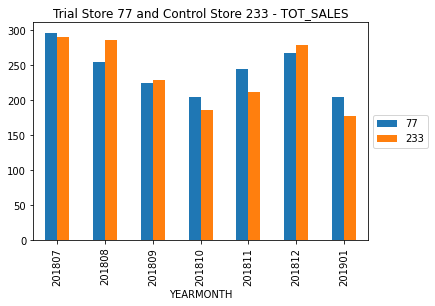

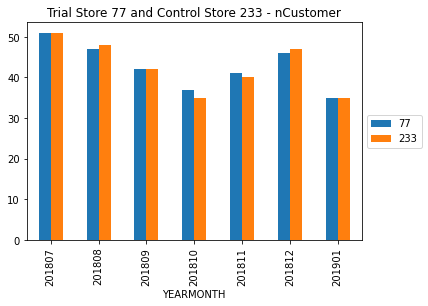

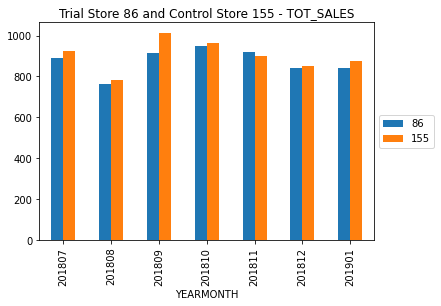

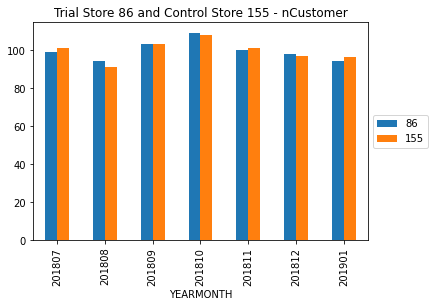

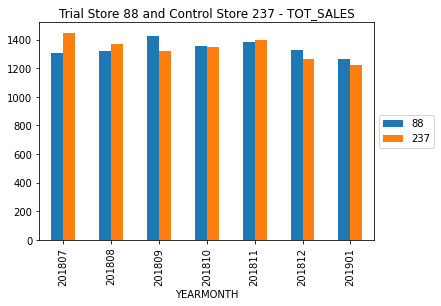

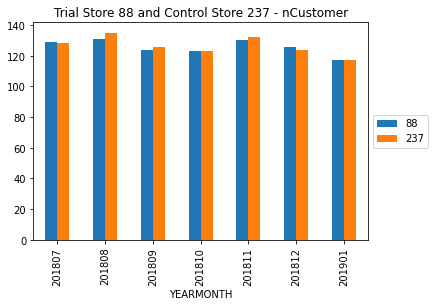

In [23]:
trial_control_dic = {77:233, 86:155, 88:237}
for key, val in trial_control_dic.items():
    pretrial_full_observ[pretrial_full_observ["STORE_NBR"].isin([key, val])].groupby(
        ["YEARMONTH", "STORE_NBR"]).sum()["TOT_SALES"].unstack().plot.bar() #Visual checks on trends based on the drivers
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - TOT_SALES")
    plt.show()
    pretrial_full_observ[pretrial_full_observ["STORE_NBR"].isin([key, val])].groupby(
    ["YEARMONTH", "STORE_NBR"]).sum()["nCustomers"].unstack().plot.bar() #visual checks on customer count trends by comparing the trial store to the control store and other stores.
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(key)+" and Control Store "+str(val)+" - nCustomer")
    plt.show()
    print('\n')

The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.

**Next we'll compare the performance of Trial stores to Control stores during the trial period. To ensure their performance is comparable during Trial period, we need to scale (multiply to ratio of trial / control) all of Control stores' performance to Trial store's performance during pre-trial. Starting with TOT_SALES.**

In [24]:
#Ratio of Store 77 and its Control store.
sales_ratio_77 = pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 77]["TOT_SALES"].sum() / pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 233]["TOT_SALES"].sum()

#Ratio of Store 86 and its Control store.
sales_ratio_86 = pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 86]["TOT_SALES"].sum() / pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 155]["TOT_SALES"].sum()

#Ratio of Store 77 and its Control store.
sales_ratio_88 = pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 88]["TOT_SALES"].sum() / pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 237]["TOT_SALES"].sum()

In [25]:
trial_full_observ = full_observ[(full_observ["YEARMONTH"] >= 201902) & (full_observ["YEARMONTH"] <= 201904)]
scaled_sales_control_stores = full_observ[full_observ["STORE_NBR"].isin([233, 155, 237])][["STORE_NBR", "YEARMONTH", "TOT_SALES"]]

def scaler(row):
    if row["STORE_NBR"] == 233:
        return row["TOT_SALES"] * sales_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["TOT_SALES"] * sales_ratio_86
    elif row["STORE_NBR"] == 237:
        return row["TOT_SALES"] * sales_ratio_88

scaled_sales_control_stores["ScaledSales"] = scaled_sales_control_stores.apply(lambda row: scaler(row), axis=1)

trial_scaled_sales_control_stores = scaled_sales_control_stores[(scaled_sales_control_stores["YEARMONTH"] >= 201902) & (scaled_sales_control_stores["YEARMONTH"] <= 201904)]
pretrial_scaled_sales_control_stores = scaled_sales_control_stores[scaled_sales_control_stores["YEARMONTH"] < 201902]

In [26]:
trial_scaled_sales_control_stores.head()

,STORE_NBR,YEARMONTH,TOT_SALES,ScaledSales
1800,155,201902,891.2,864.522060
1801,155,201903,804.4,780.320405
1802,155,201904,844.6,819.317024
2706,233,201902,244.0,249.762622
2707,233,201903,199.1,203.802205


In [27]:
pretrial_scaled_sales_control_stores.head()

,STORE_NBR,YEARMONTH,TOT_SALES,ScaledSales
1793,155,201807,924.6,896.922236
1794,155,201808,782.7,759.269991
1795,155,201809,1014.4,984.034086
1796,155,201810,963.8,934.948790
1797,155,201811,898.8,871.894555


In [28]:
trial_full_observ.head()

,STORE_NBR,YEARMONTH,TOT_SALES,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
7,1,201902,225.4,52,1.057692,1.250000,3.467692
8,1,201903,192.9,45,1.088889,1.288889,3.325862
9,1,201904,192.9,42,1.023810,1.357143,3.384211
19,2,201902,139.4,29,1.103448,1.275862,3.767568
20,2,201903,192.1,43,1.069767,1.186047,3.766667


Now that we have comparable sales figures for the control store, we can calculate
the percentage difference between the scaled control sales and the trial store's
sales during the trial period.

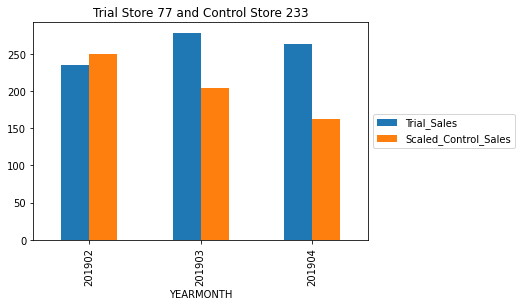

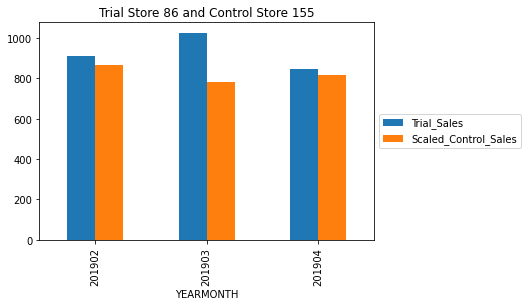

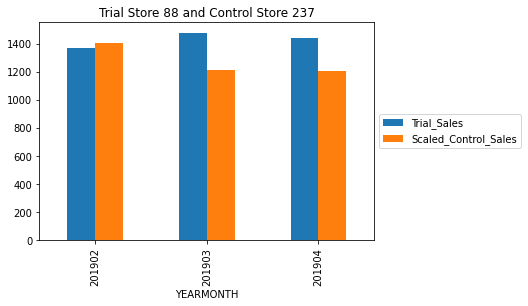

In [29]:
percentage_diff = {}

for trial, control in trial_control_dic.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "TOT_SALES"]]
    percentage_diff[trial] = b["TOT_SALES"].sum() / a["ScaledSales"].sum()
    b[["YEARMONTH", "TOT_SALES"]].merge(a[["YEARMONTH", "ScaledSales"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_Sales", "TOT_SALES":"Trial_Sales"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [30]:
b[["YEARMONTH", "TOT_SALES"]].merge(a[["YEARMONTH", "ScaledSales"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_Sales", "TOT_SALES":"Trial_Sales"})




,Trial_Sales,Scaled_Control_Sales
YEARMONTH,,
201902,1370.2,1406.989143
201903,1477.2,1210.082775
201904,1439.4,1206.477165


In [31]:
percentage_diff

{77: 1.2615468650086274, 86: 1.13150143573637, 88: 1.1211573087672315}

In [32]:
temp1 = scaled_sales_control_stores.sort_values(by=["STORE_NBR", "YEARMONTH"], ascending=[False, True]).reset_index(drop= True).drop(["TOT_SALES"], axis=1)


In [33]:
def label_str_nbr(cell):
  if cell == 237:
    return 88
  elif cell == 233:
    return 77
  else:
      return 86
temp1['STR_NBR']= temp1["STORE_NBR"].apply(lambda cell: label_str_nbr(cell))

In [34]:
temp1 = temp1.sort_values(by=["STR_NBR"], ascending=True)

In [35]:
temp2 = full_observ[full_observ["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEARMONTH", "TOT_SALES"]].sort_values(by=["YEARMONTH"], ascending=True).reset_index(drop= True)
temp2.rename(columns = {'STORE_NBR':'STR_NBR'}, inplace = True)

In [36]:
kk =temp1.merge(temp2,on=["STR_NBR","YEARMONTH"])
kk

,STORE_NBR,YEARMONTH,ScaledSales,STR_NBR,TOT_SALES
0,233,201812,286.408121,77,267.30
1,233,201902,249.762622,77,235.00
2,233,201901,181.692071,77,204.40
3,233,201905,352.533799,77,299.30
4,233,201811,216.597421,77,245.30
5,233,201810,190.085733,77,204.50
6,233,201809,233.998916,77,225.20
7,233,201808,292.652187,77,255.50
8,233,201807,297.565550,77,296.80
9,233,201906,226.219424,77,264.70


In [37]:
#Creating a compiled percentage_difference table

scaledsales_vs_trial = kk
scaledsales_vs_trial.columns = ["c_STORE_NBR", "YEARMONTH", "c_ScaledSales", "t_STORE_NBR", "t_TOT_SALES"]
scaledsales_vs_trial["Sales_Percentage_Diff"] = (scaledsales_vs_trial["t_TOT_SALES"] - scaledsales_vs_trial["c_ScaledSales"]) / (((scaledsales_vs_trial["t_TOT_SALES"] + scaledsales_vs_trial["c_ScaledSales"])/2))
def label_period(cell):
    if cell < 201902:
        return "pre"
    elif cell > 201904:
        return "post"
    else:
        return "trial"
scaledsales_vs_trial["trial_period"] = scaledsales_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]

,c_STORE_NBR,YEARMONTH,c_ScaledSales,t_STORE_NBR,t_TOT_SALES,Sales_Percentage_Diff,trial_period
1,233,201902,249.762622,77,235.0,-0.060907,trial
10,233,201904,162.345704,77,263.5,0.475075,trial
11,233,201903,203.802205,77,278.5,0.309755,trial
18,155,201902,864.522060,86,913.2,0.054764,trial
19,155,201903,780.320405,86,1026.8,0.272787,trial
20,155,201904,819.317024,86,848.2,0.034642,trial
26,237,201904,1206.477165,88,1439.4,0.176065,trial
27,237,201903,1210.082775,88,1477.2,0.198801,trial
28,237,201902,1406.989143,88,1370.2,-0.026494,trial


**Check significance of Trial minus Control stores TOT_SALES Percentage Difference Pre-Trial vs Trial.**

**Step 1**: Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.

**Step 2**: Proof control and trial stores are similar statistically

**Check p-value of control store's Pre-Trial vs Trial store's Pre-Trial.**
  - If <5%, it is significantly different. If >5%, it is not significantly different (similar).
  
**Step 3**: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

Check T-Value of Percentage Difference of each Trial month (Feb, March, April 2019).
  - Mean is mean of Percentage Difference during pre-trial.
  - Standard deviation is stdev of Percentage Difference during pre-trial.
  - Formula is Trial month's Percentage Difference minus Mean, divided by Standard deviation.
  - Compare each T-Value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)

In [38]:
from scipy.stats import ttest_ind, t

# Step 1
for num in [237, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"],
                   equal_var=False), '\n')
    #print(len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"]), len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num]["ScaledSales"]))
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == num]),
                       len(trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == num])])-1))

Store 237
Ttest_indResult(statistic=0.9103825198144735, pvalue=0.4333445481196887) 

Store 155
Ttest_indResult(statistic=1.429195687929098, pvalue=0.19727058651603258) 

Store 233
Ttest_indResult(statistic=1.1911026010974504, pvalue=0.29445006064862156) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


Null hypothesis is true. There isn't any statistically significant difference between control store's scaled Pre-Trial and Trial period sales.

In [39]:
# Step 2
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["TOT_SALES"],
                   pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"],
                   equal_var=True), '\n')
    #print(len(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["TOT_SALES"]),len(pretrial_scaled_sales_control_stores[pretrial_scaled_sales_control_stores["STORE_NBR"] == cont]["ScaledSales"]))

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=-1.2533353315065926e-15, pvalue=0.999999999999999) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 88 , Control store: 237
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


Null hypothesis is true. There isn't any statistically significant difference between Trial store's sales and Control store's scaled-sales performance during pre-trial.

In [40]:
scaledsales_vs_trial

,c_STORE_NBR,YEARMONTH,c_ScaledSales,t_STORE_NBR,t_TOT_SALES,Sales_Percentage_Diff,trial_period
0,233,201812,286.408121,77,267.30,-0.069019,pre
1,233,201902,249.762622,77,235.00,-0.060907,trial
2,233,201901,181.692071,77,204.40,0.117630,pre
3,233,201905,352.533799,77,299.30,-0.163335,post
4,233,201811,216.597421,77,245.30,0.124281,pre
5,233,201810,190.085733,77,204.50,0.073060,pre
6,233,201809,233.998916,77,225.20,-0.038323,pre
7,233,201808,292.652187,77,255.50,-0.135554,pre
8,233,201807,297.565550,77,296.80,-0.002576,pre
9,233,201906,226.219424,77,264.70,0.156769,post


In [41]:
# Step 3
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == cont) & (scaledsales_vs_trial["trial_period"]=="pre")]
    std = temp_pre["Sales_Percentage_Diff"].std()
    mean = temp_pre["Sales_Percentage_Diff"].mean()
    print(std, mean)
    for t_month in scaledsales_vs_trial[scaledsales_vs_trial["trial_period"] == "trial"]["YEARMONTH"].unique():
        pdif = scaledsales_vs_trial[(scaledsales_vs_trial["YEARMONTH"] == t_month) & (scaledsales_vs_trial["t_STORE_NBR"] == trial)]["Sales_Percentage_Diff"]
        print(t_month,":",((float(pdif)-mean)/std))
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
0.09877934078976931 0.009928441647086542
201902 : -0.7171038288055889
201904 : 4.708944418758204
201903 : 3.0353179288556627


Trial store: 86 , Control store: 155
0.0381846080196662 0.0007957295846298444
201902 : 1.4133618775921795
201904 : 0.8863824572944161
201903 : 7.123063846042148


Trial store: 88 , Control store: 237
0.058001962645876204 0.0008492939256440227
201902 : -0.4714166528427281
201904 : 3.0208537098692987
201903 : 3.4128446219735284


Critical t-value for 95% confidence interval:
1.9431802803927816


We can observe that the t-value is much larger than the 95th percentile value of
the t-distribution for March and April - i.e. the increase in sales in the trial
store in March and April is statistically greater than in the control store.

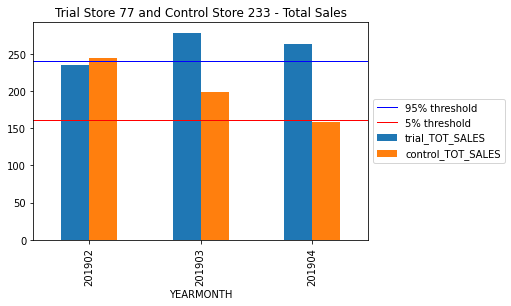

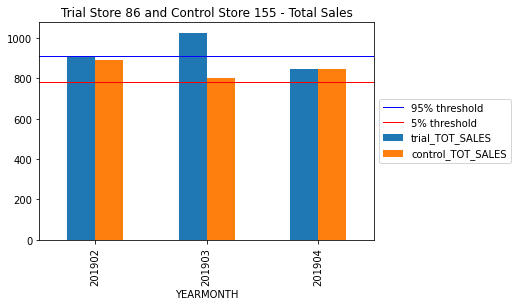

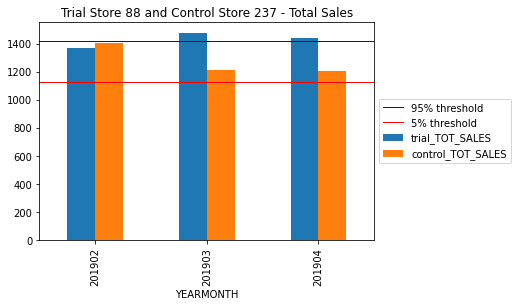

In [42]:
for trial, control in trial_control_dic.items():
    a = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control].rename(columns={"TOT_SALES": "control_TOT_SALES"})
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "TOT_SALES"]].rename(columns={"TOT_SALES": "trial_TOT_SALES"})
    comb = b[["YEARMONTH", "trial_TOT_SALES"]].merge(a[["YEARMONTH", "control_TOT_SALES"]],on="YEARMONTH").set_index("YEARMONTH")
    comb.plot.bar()
    cont_sc_sales = trial_scaled_sales_control_stores[trial_scaled_sales_control_stores["STORE_NBR"] == control]["TOT_SALES"]
    std = scaledsales_vs_trial[(scaledsales_vs_trial["c_STORE_NBR"] == control) & (scaledsales_vs_trial["trial_period"]=="pre")]["Sales_Percentage_Diff"].std()
    thresh95 = cont_sc_sales.mean() + (cont_sc_sales.mean() * std * 2)
    thresh5 = cont_sc_sales.mean() - (cont_sc_sales.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Total Sales")
    plt.savefig("TS {} and CS {} - TOT_SALES.png".format(trial,control), bbox_inches="tight")

The results show that the trial in store 77 is significantly different to its
control store in the trial period as the trial store performance lies outside the
5% to 95% confidence interval of the control store in two of the three trial
months.

**Next, we'll look into nCustomers.**

In [43]:
#Ratio of Store 77 and its Control store.
ncust_ratio_77 = pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 77]["nCustomers"].sum() / pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 233]["nCustomers"].sum()

#Ratio of Store 86 and its Control store.
ncust_ratio_86 = pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 86]["nCustomers"].sum() / pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 155]["nCustomers"].sum()

#Ratio of Store 77 and its Control store.
ncust_ratio_88 = pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 88]["nCustomers"].sum() / pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == 237]["nCustomers"].sum()

In [44]:

#trial_full_observ = full_observ[(full_observ["YEARMONTH"] >= 201902) & (full_observ["YEARMONTH"] <= 201904)]
scaled_ncust_control_stores = full_observ[full_observ["STORE_NBR"].isin([233, 155, 237])][["STORE_NBR", "YEARMONTH", "nCustomers"]]

def scaler_c(row):
    if row["STORE_NBR"] == 233:
        return row["nCustomers"] * ncust_ratio_77
    elif row["STORE_NBR"] == 155:
        return row["nCustomers"] * ncust_ratio_86
    elif row["STORE_NBR"] == 237:
        return row["nCustomers"] * ncust_ratio_88

scaled_ncust_control_stores["ScaledNcust"] = scaled_ncust_control_stores.apply(lambda row: scaler_c(row), axis=1)

trial_scaled_ncust_control_stores = scaled_ncust_control_stores[(scaled_ncust_control_stores["YEARMONTH"] >= 201902) & (scaled_ncust_control_stores["YEARMONTH"] <= 201904)]
pretrial_scaled_ncust_control_stores = scaled_ncust_control_stores[scaled_ncust_control_stores["YEARMONTH"] < 201902]

In [45]:
scaled_ncust_control_stores

,STORE_NBR,YEARMONTH,nCustomers,ScaledNcust
1793,155,201807,101,101.000000
1794,155,201808,91,91.000000
1795,155,201809,103,103.000000
1796,155,201810,108,108.000000
1797,155,201811,101,101.000000
1798,155,201812,97,97.000000
1799,155,201901,96,96.000000
1800,155,201902,95,95.000000
1801,155,201903,94,94.000000
1802,155,201904,99,99.000000


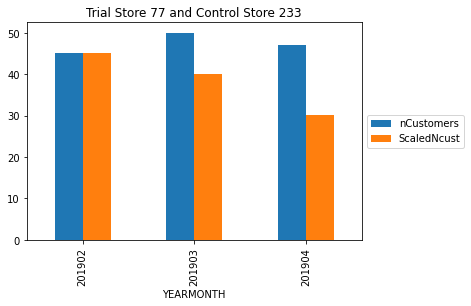

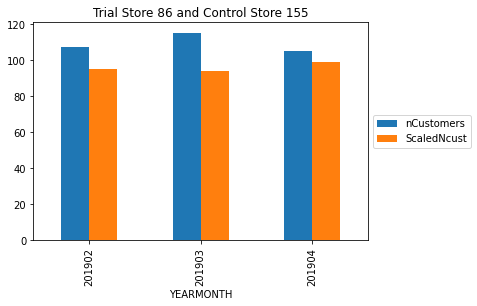

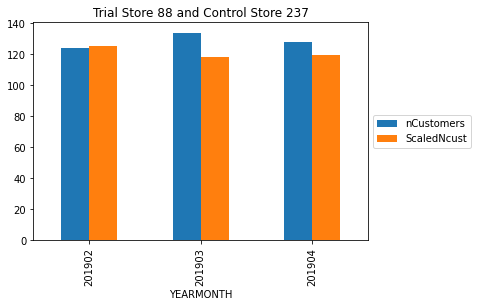

In [46]:
ncust_percentage_diff = {}

for trial, control in trial_control_dic.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control]
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "nCustomers"]]
    ncust_percentage_diff[trial] = b["nCustomers"].sum() / a["ScaledNcust"].sum()
    b[["YEARMONTH", "nCustomers"]].merge(a[["YEARMONTH", "ScaledNcust"]],on="YEARMONTH").set_index("YEARMONTH").rename(columns={"ScaledSales":"Scaled_Control_nCust", "TOT_SALES":"Trial_nCust"}).plot.bar()
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control))

In [47]:

ncust_percentage_diff

{77: 1.2306529009742622, 86: 1.1354166666666667, 88: 1.0635429638854295}

In [48]:
temp1 = scaled_ncust_control_stores.sort_values(by=["STORE_NBR", "YEARMONTH"], ascending=[False, True]).reset_index(drop= True).drop(["nCustomers"], axis=1)
def label_str_nbr(cell):
  if cell == 237:
    return 88
  elif cell == 233:
    return 77
  else:
      return 86
temp1['STR_NBR']= temp1["STORE_NBR"].apply(lambda cell: label_str_nbr(cell))
temp1 = temp1.sort_values(by=["STR_NBR"], ascending=True)
temp2 = full_observ[full_observ["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEARMONTH", "nCustomers"]].sort_values(by=["YEARMONTH"], ascending=True).reset_index(drop= True)
temp2.rename(columns = {'STORE_NBR':'STR_NBR'}, inplace = True)
kk =temp1.merge(temp2,on=["STR_NBR","YEARMONTH"])
kk

,STORE_NBR,YEARMONTH,ScaledNcust,STR_NBR,nCustomers
0,233,201812,47.157718,77,46
1,233,201902,45.151007,77,45
2,233,201901,35.117450,77,35
3,233,201905,57.191275,77,55
4,233,201811,40.134228,77,41
5,233,201810,35.117450,77,37
6,233,201809,42.140940,77,42
7,233,201808,48.161074,77,47
8,233,201807,51.171141,77,51
9,233,201906,41.137584,77,41


In [49]:
#Creating a compiled ncust_percentage_difference table
#temp1 = scaled_ncust_control_stores.sort_values(by=["STORE_NBR", "YEARMONTH"], ascending=[False, True]).reset_index().drop(["nCustomers", "index"], axis=1)
#temp2 = full_observ[full_observ["STORE_NBR"].isin([77,86,88])][["STORE_NBR", "YEARMONTH", "nCustomers"]].reset_index().drop(["index", "YEARMONTH"], axis=1)
scaledncust_vs_trial = kk
scaledncust_vs_trial.columns = ["c_STORE_NBR", "YEARMONTH", "c_ScaledNcust", "t_STORE_NBR", "t_nCustomers"]
scaledncust_vs_trial["nCust_Percentage_Diff"] = (scaledncust_vs_trial["t_nCustomers"] - scaledncust_vs_trial["c_ScaledNcust"]) / (((scaledncust_vs_trial["t_nCustomers"] + scaledncust_vs_trial["c_ScaledNcust"])/2))

scaledncust_vs_trial["trial_period"] = scaledncust_vs_trial["YEARMONTH"].apply(lambda cell: label_period(cell))
scaledncust_vs_trial[scaledncust_vs_trial["trial_period"] == "trial"]

,c_STORE_NBR,YEARMONTH,c_ScaledNcust,t_STORE_NBR,t_nCustomers,nCust_Percentage_Diff,trial_period
1,233,201902,45.151007,77,45,-0.003350,trial
10,233,201904,30.100671,77,47,0.438370,trial
11,233,201903,40.134228,77,50,0.218913,trial
18,155,201902,95.000000,86,107,0.118812,trial
19,155,201903,94.000000,86,115,0.200957,trial
20,155,201904,99.000000,86,105,0.058824,trial
26,237,201904,119.322034,88,128,0.070175,trial
27,237,201903,118.327684,88,134,0.124222,trial
28,237,201902,125.288136,88,124,-0.010335,trial


Check significance of Trial minus Control stores nCustomers Percentage Difference Pre-Trial vs Trial.
  - Step 1: Check null hypothesis of 0 difference between control store's Pre-Trial and Trial period performance.
  - Step 2: Proof control and trial stores are similar statistically
  - Step 3: After checking Null Hypothesis of first 2 step to be true, we can check Null Hypothesis of Percentage Difference between Trial and Control stores during pre-trial is the same as during trial.

In [50]:
# Step 1
for num in [237, 155, 233]:
    print("Store", num)
    print(ttest_ind(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == num]["ScaledNcust"],
                   trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == num]["ScaledNcust"],
                   equal_var=False), '\n')
    
alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=min([len(pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == num]),
                       len(trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == num])])-1))

Store 237
Ttest_indResult(statistic=1.5160218417872122, pvalue=0.1788106250211205) 

Store 155
Ttest_indResult(statistic=1.3888888888888882, pvalue=0.204345986327886) 

Store 233
Ttest_indResult(statistic=0.8442563765225701, pvalue=0.4559280037660254) 

Critical t-value for 95% confidence interval:
[-4.30265273  4.30265273]


In [51]:
# Step 2
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    print(ttest_ind(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial]["nCustomers"],
                   pretrial_scaled_ncust_control_stores[pretrial_scaled_ncust_control_stores["STORE_NBR"] == cont]["ScaledNcust"],
                   equal_var=True), '\n')

alpha = 0.05
print("Critical t-value for 95% confidence interval:")
print(t.ppf((alpha/2, 1-alpha/2), df=len(pretrial_full_observ[pretrial_full_observ["STORE_NBR"] == trial])-1))

Trial store: 77 , Control store: 233
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 86 , Control store: 155
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Trial store: 88 , Control store: 237
Ttest_indResult(statistic=0.0, pvalue=1.0) 

Critical t-value for 95% confidence interval:
[-2.44691185  2.44691185]


In [52]:
# Step 3
for trial, cont in trial_control_dic.items():
    print("Trial store:", trial, ", Control store:", cont)
    temp_pre = scaledncust_vs_trial[(scaledncust_vs_trial["c_STORE_NBR"] == cont) & (scaledncust_vs_trial["trial_period"]=="pre")]
    std = temp_pre["nCust_Percentage_Diff"].std()
    mean = temp_pre["nCust_Percentage_Diff"].mean()
    #print(std, mean)
    for t_month in scaledncust_vs_trial[scaledncust_vs_trial["trial_period"] == "trial"]["YEARMONTH"].unique():
        pdif = scaledncust_vs_trial[(scaledncust_vs_trial["YEARMONTH"] == t_month) & (scaledncust_vs_trial["t_STORE_NBR"] == trial)]["nCust_Percentage_Diff"]
        print(t_month,":",(float(pdif)-mean)/std)
    print('\n')
    
print("Critical t-value for 95% confidence interval:")
conf_intv_95 = t.ppf(0.95, df=len(temp_pre)-1)
print(conf_intv_95)

Trial store: 77 , Control store: 233
201902 : -0.19886295797440684
201904 : 16.114474772873923
201903 : 8.00960902538093


Trial store: 86 , Control store: 155
201902 : 6.220524882227514
201904 : 3.0763575852842706
201903 : 10.52599074274189


Trial store: 88 , Control store: 237
201902 : -0.6706311831628834
201904 : 4.406627816109982
201903 : 7.815002207822421


Critical t-value for 95% confidence interval:
1.9431802803927816


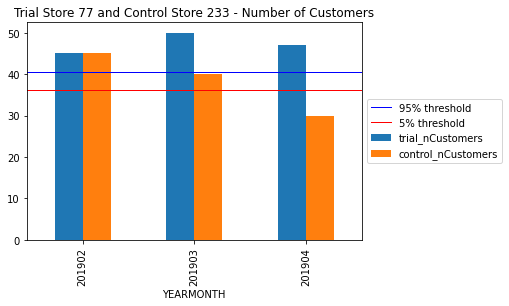

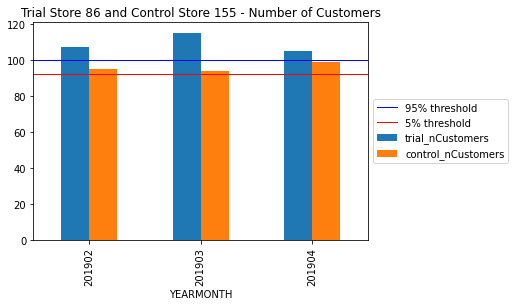

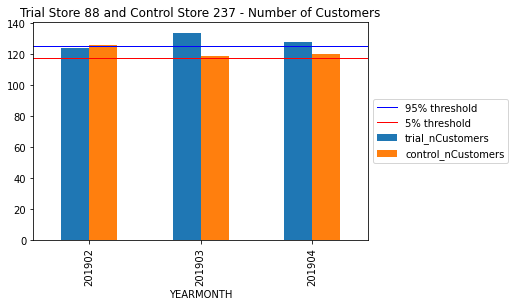

In [53]:

for trial, control in trial_control_dic.items():
    a = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control].rename(columns={"nCustomers": "control_nCustomers"})
    b = trial_full_observ[trial_full_observ["STORE_NBR"] == trial][["STORE_NBR", "YEARMONTH", "nCustomers"]].rename(columns={"nCustomers": "trial_nCustomers"})
    comb = b[["YEARMONTH", "trial_nCustomers"]].merge(a[["YEARMONTH", "control_nCustomers"]],on="YEARMONTH").set_index("YEARMONTH")
    comb.plot.bar()
    cont_sc_ncust = trial_scaled_ncust_control_stores[trial_scaled_ncust_control_stores["STORE_NBR"] == control]["nCustomers"]
    std = scaledncust_vs_trial[(scaledncust_vs_trial["c_STORE_NBR"] == control) & (scaledncust_vs_trial["trial_period"]=="pre")]["nCust_Percentage_Diff"].std()
    thresh95 = cont_sc_ncust.mean() + (cont_sc_ncust.mean() * std * 2)
    thresh5 = cont_sc_ncust.mean() - (cont_sc_ncust.mean() * std * 2)
    plt.axhline(y=thresh95,linewidth=1, color='b', label="95% threshold")
    plt.axhline(y=thresh5,linewidth=1, color='r', label="5% threshold")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title("Trial Store "+str(trial)+" and Control Store "+str(control)+" - Number of Customers")
    plt.savefig("TS {} and CS {} - nCustomers.png".format(trial,control), bbox_inches="tight")

The results show that the trial in store 77 is significantly different to its
control store in the trial period as the trial store performance lies outside the
5% to 95% confidence interval of the control store in two of the three trial
months.

**Overall the trial showed positive significant result**